In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('../recruitment_data.csv')
df.head()
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X

Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0      26       1               2                0                  3   
1      39       1               4               12                  3   
2      48       0               2                3                  2   
3      34       1               2                5                  2   
4      30       0               1                6                  1   
...   ...     ...             ...              ...                ...   
1495   48       0               2                3                  4   
1496   27       1               2               10                  3   
1497   24       1               1                1                  2   
1498   48       0               2                4                  4   
1499   34       1               2               11                  5   

      DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0               26.783828              48          78                91   
1               25.862694              35          68                80   
2                9.920805              20          67                13   
3                6.407751              36          27                70   
4               43.105343              23          52                85   
...                   ...             ...         ...               ...   
1495             9.183783              66           3                80   
1496            14.847731              43          97                 7   
1497             4.289911              31          91                58   
1498            36.299263               9          37                44   
1499            12.910472              63          40                26   

      RecruitmentStrategy  
0                       1  
1                       2  
2                       2  
3                       3  
4                       2  
...                   ...  
1495                    3  
1496                    2  
1497                    1  
1498                    2  
1499                    2  

[1500 rows x 10 columns]

## Visualization

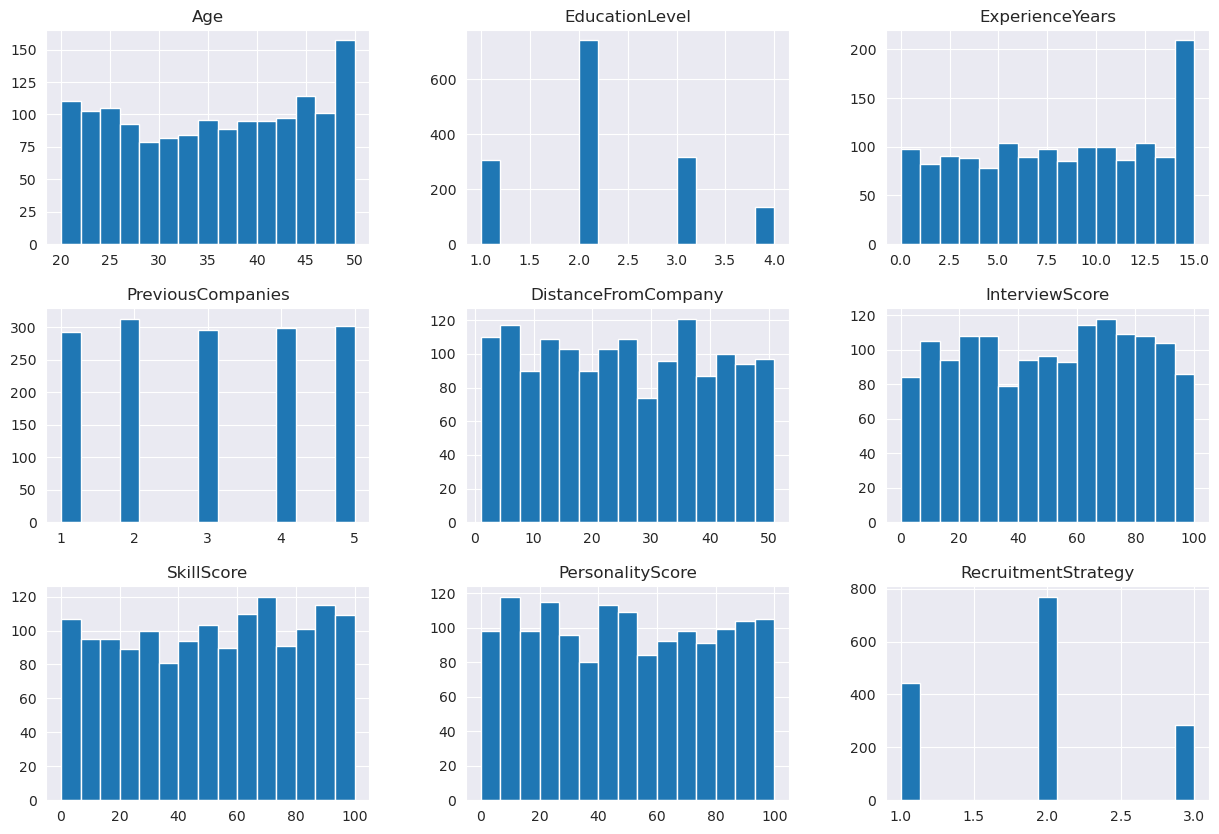

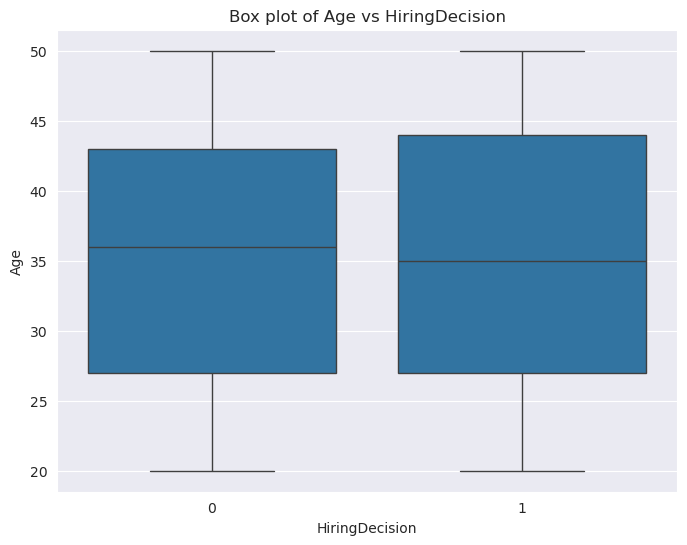

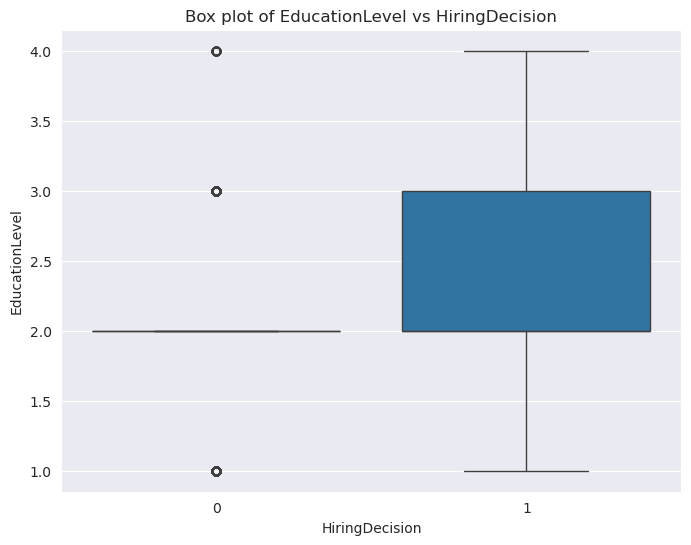

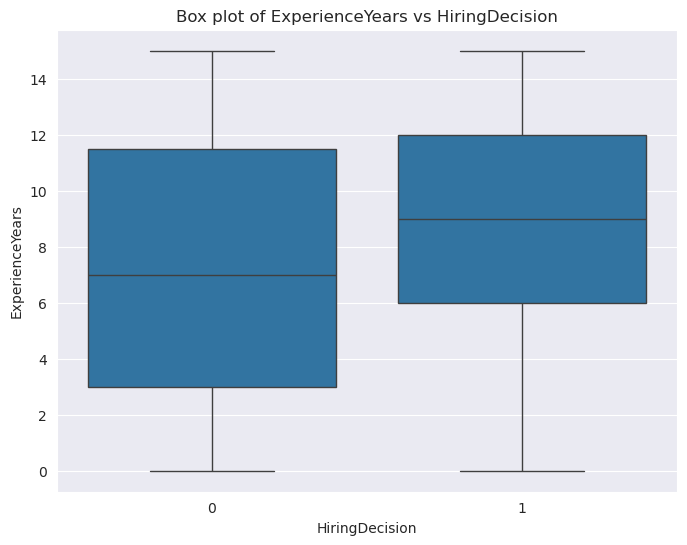

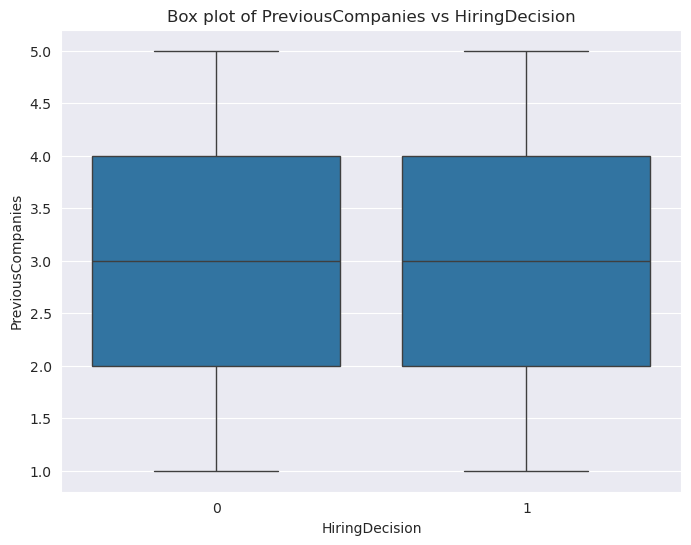

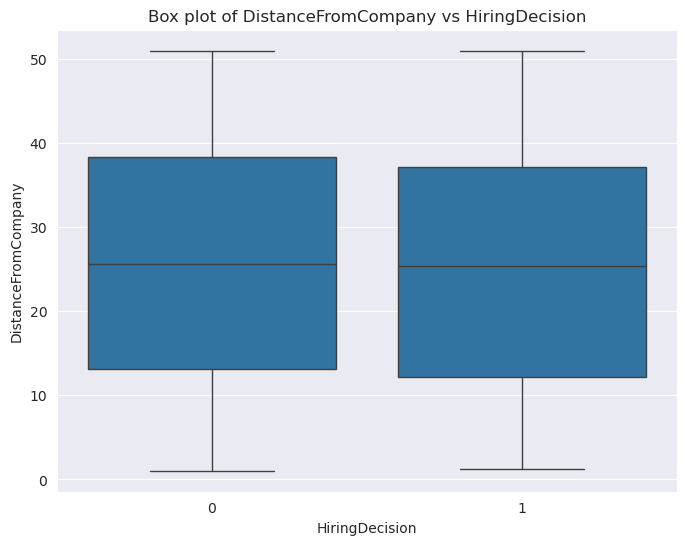

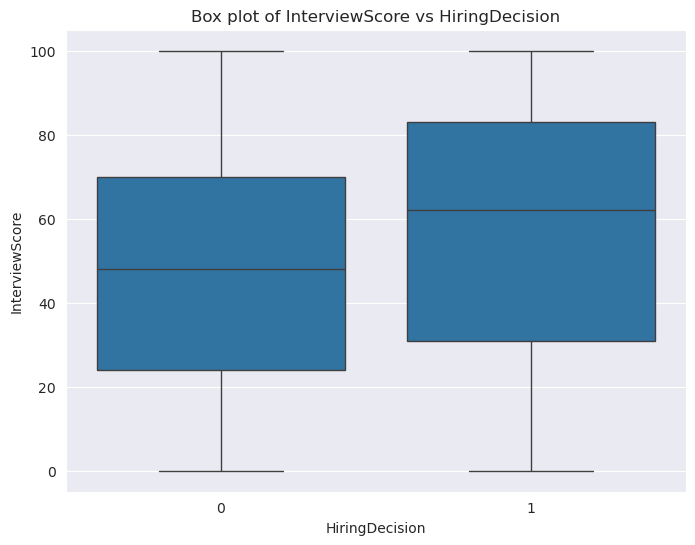

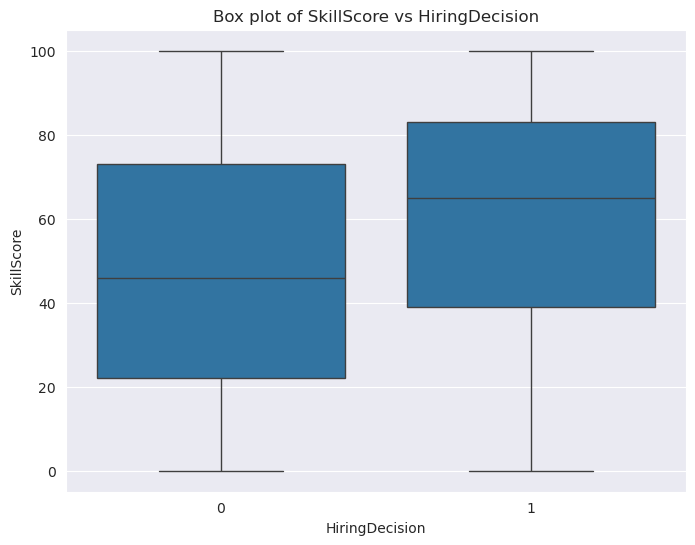

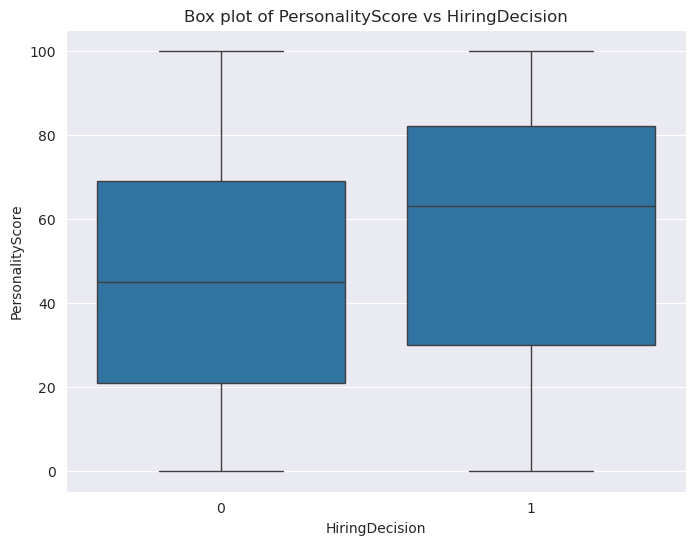

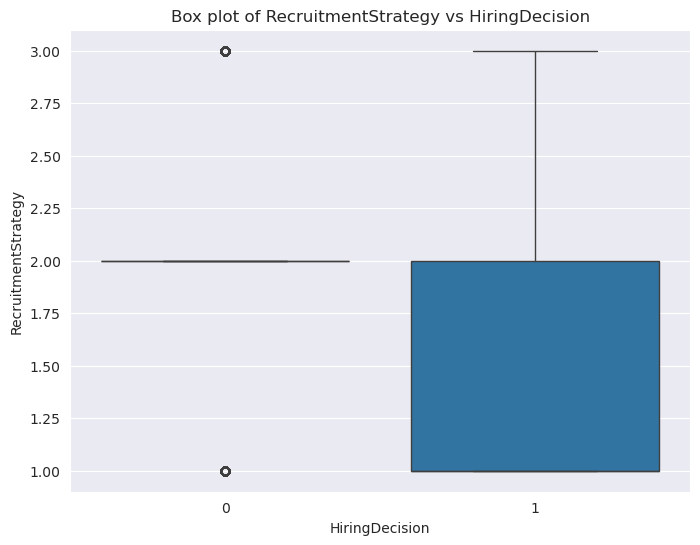

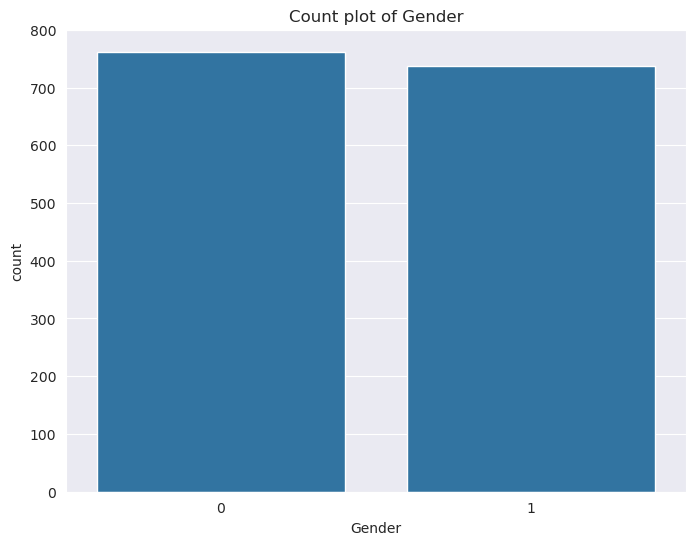

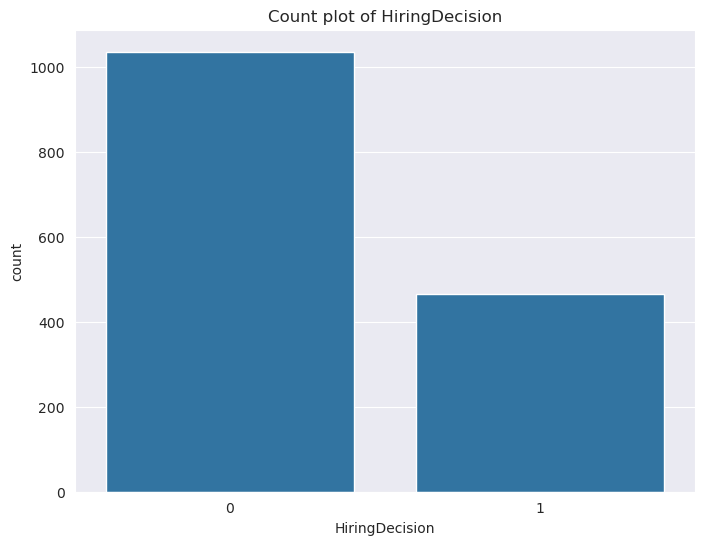

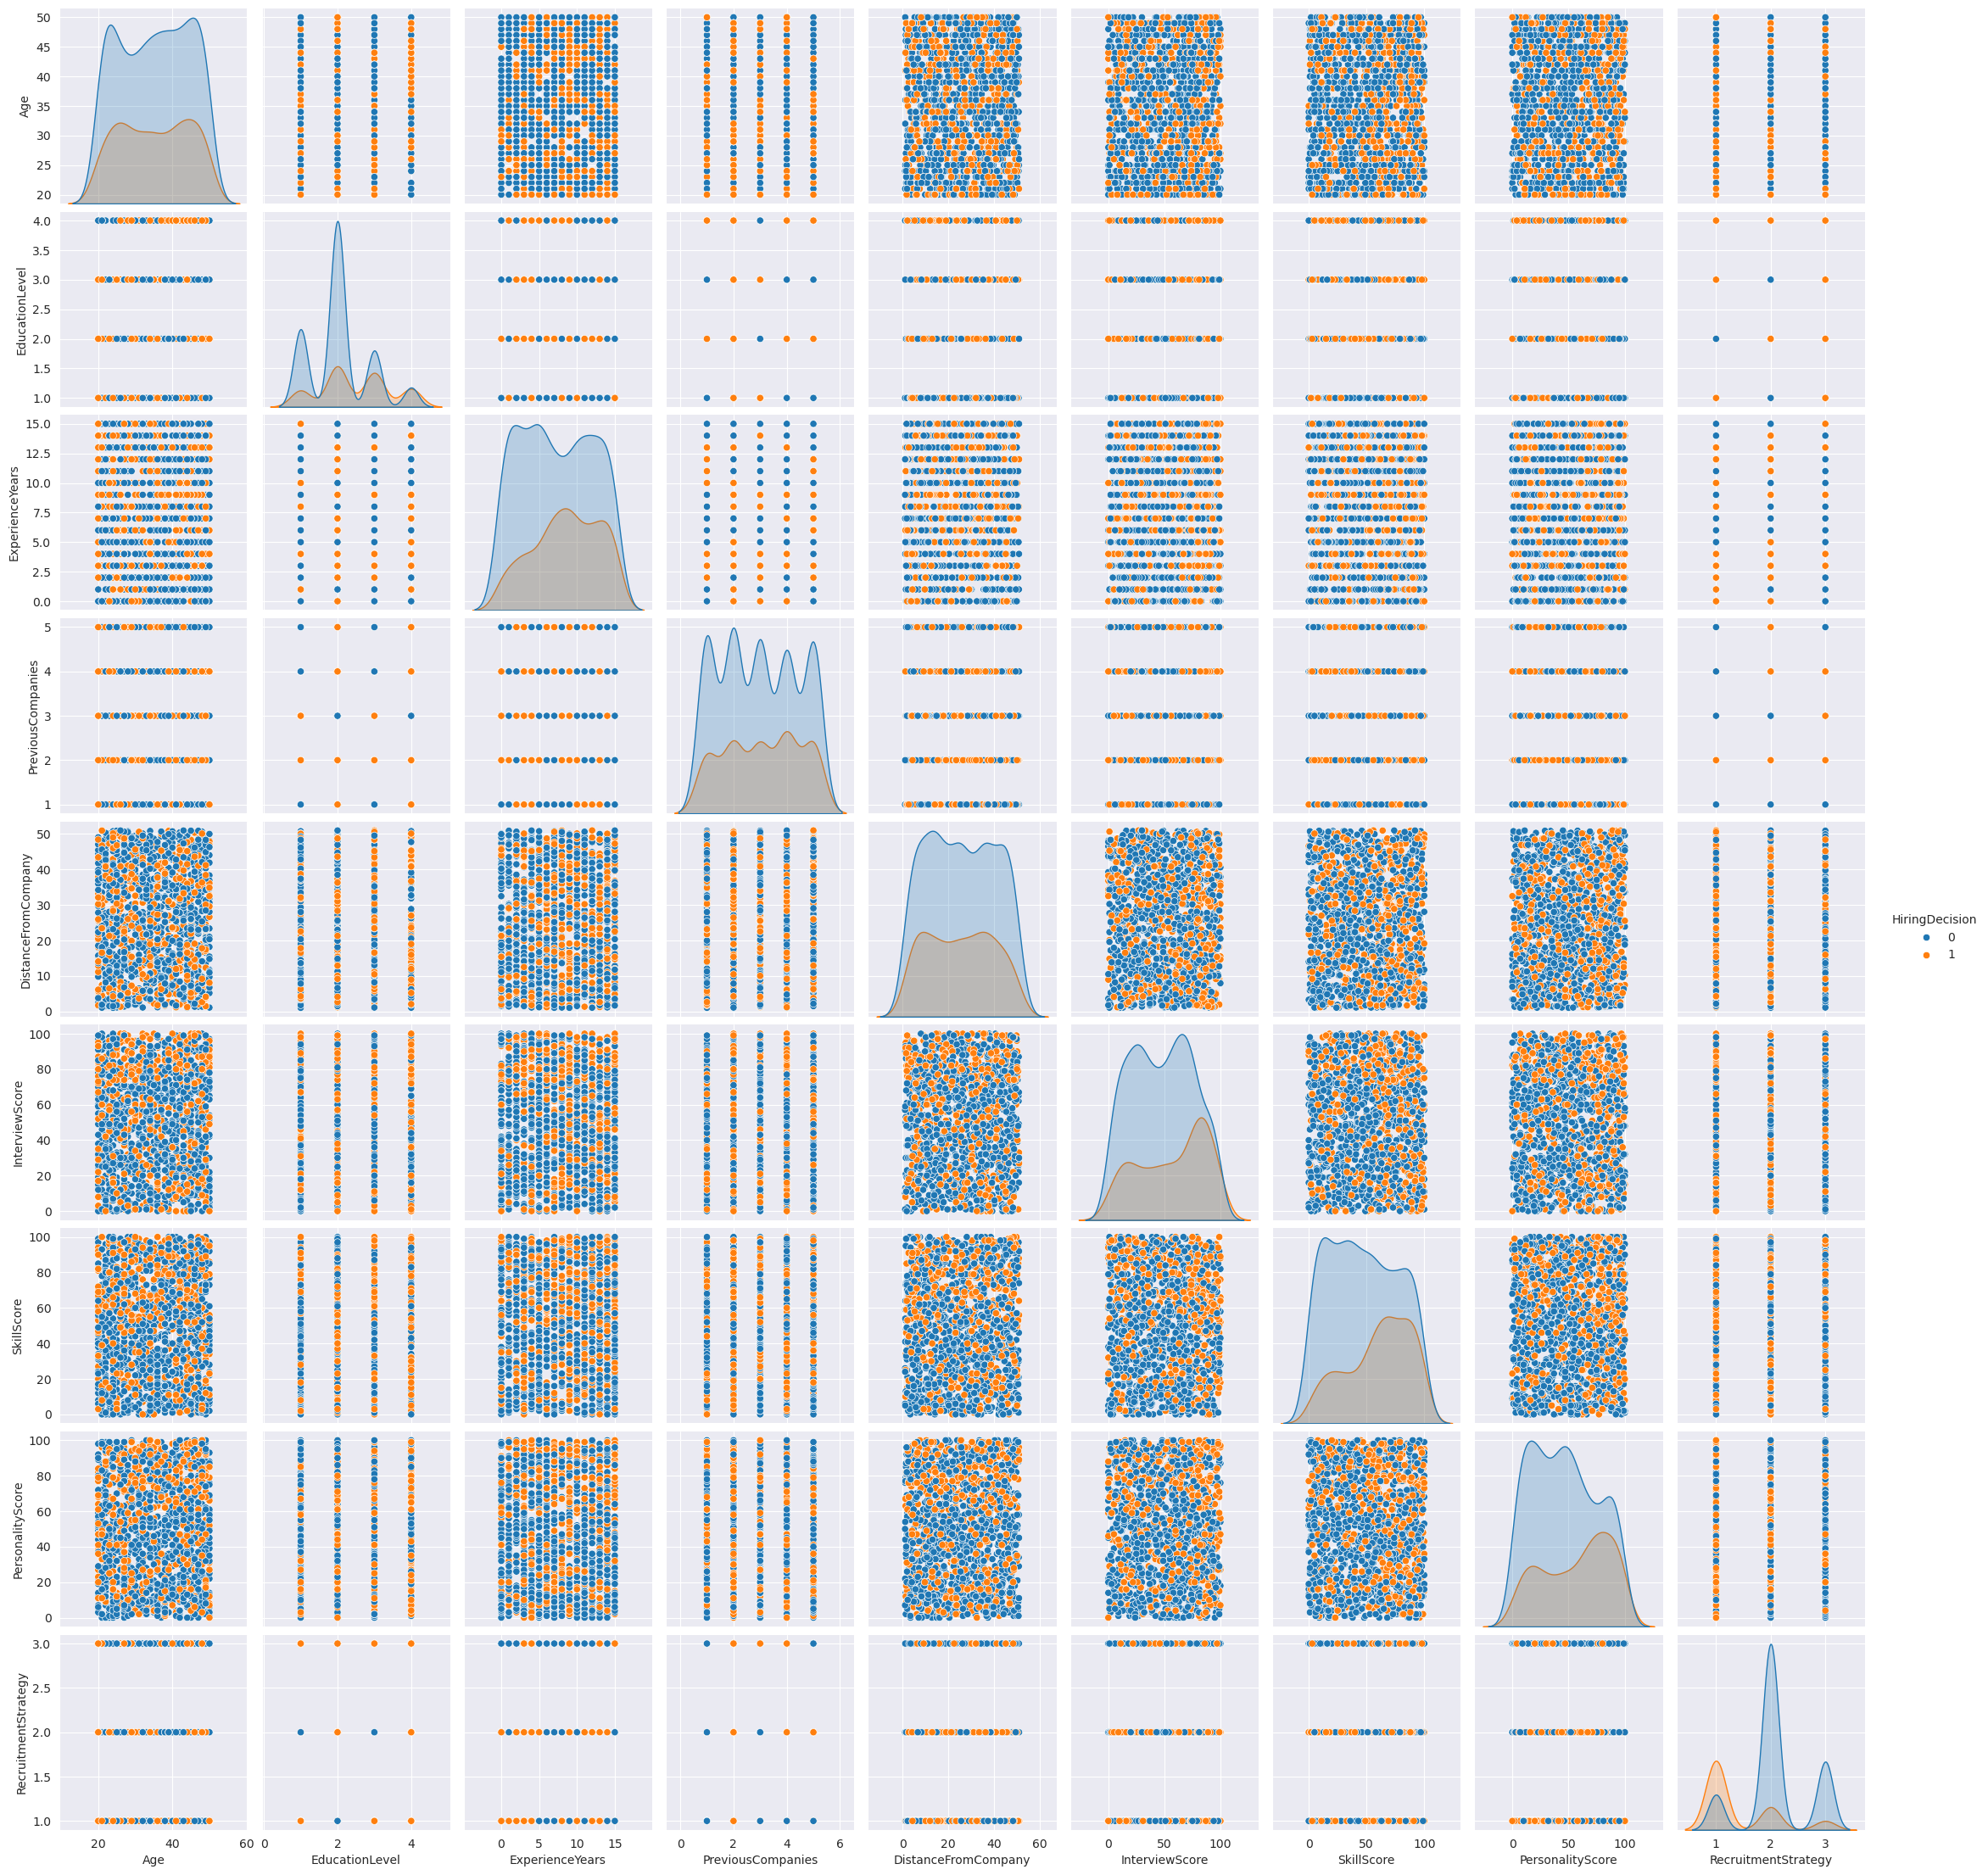

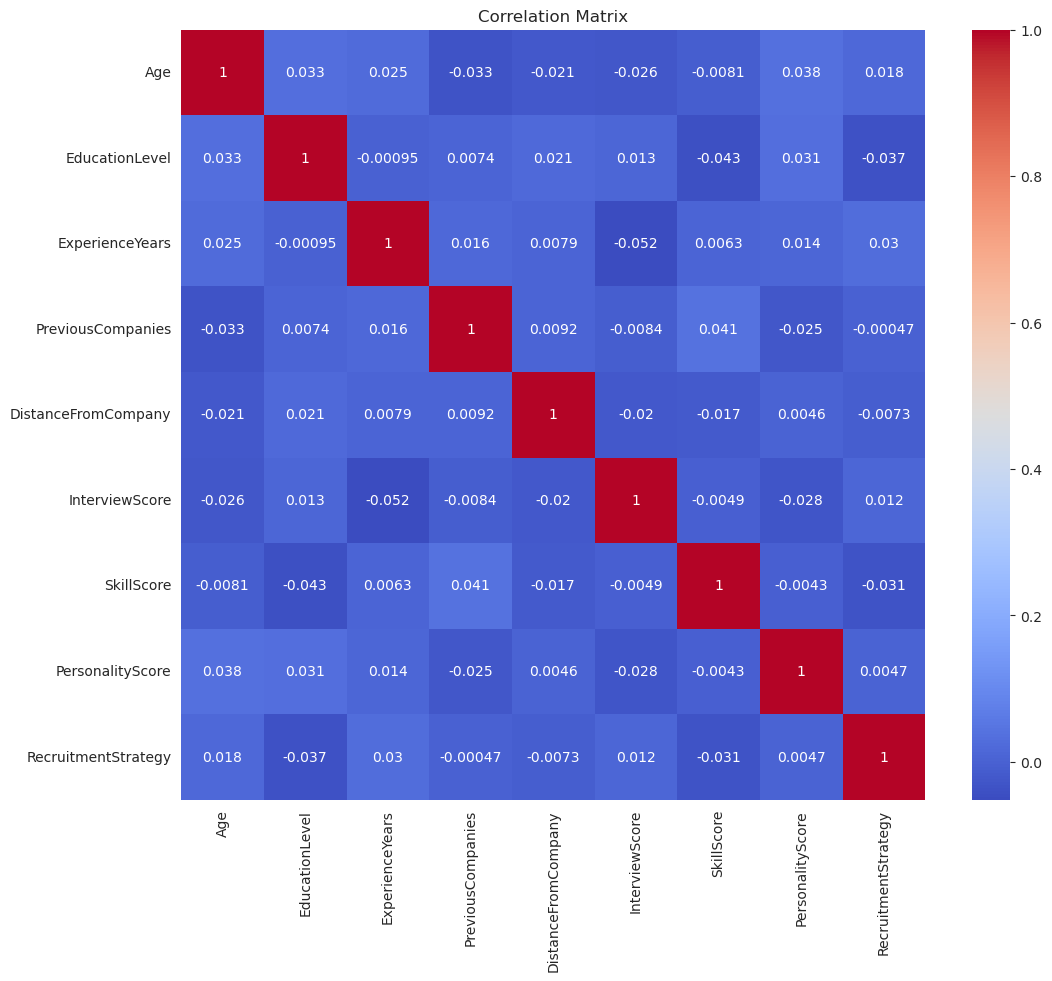

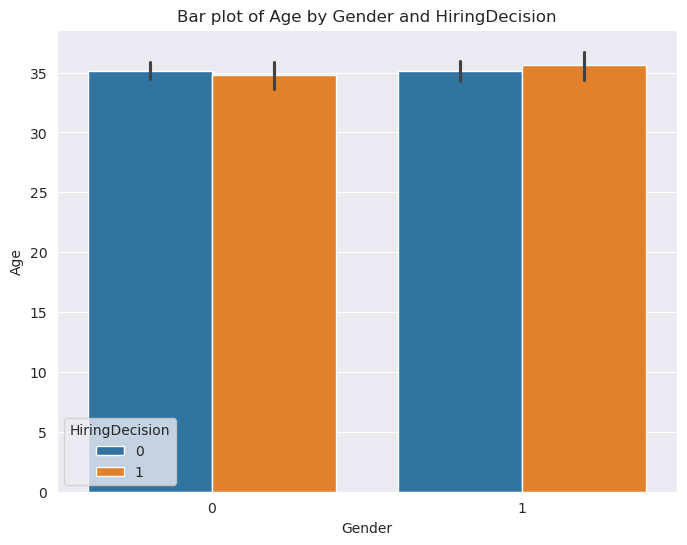

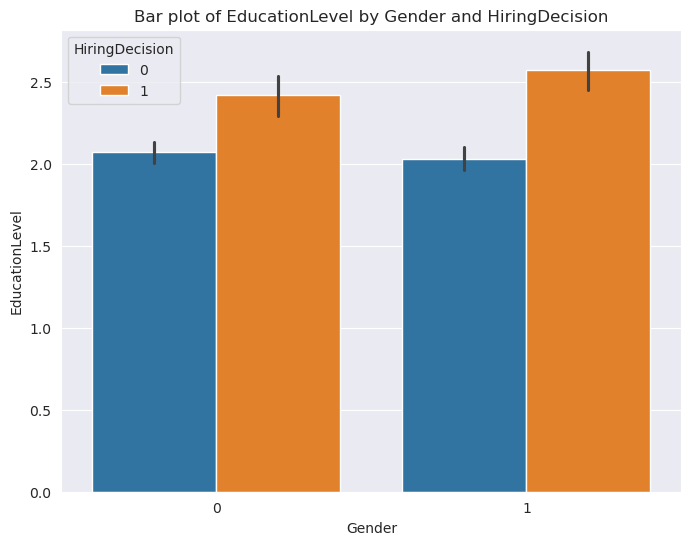

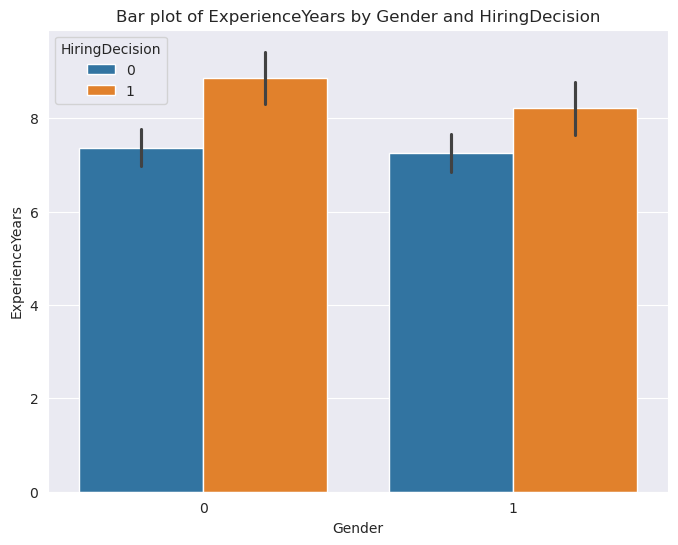

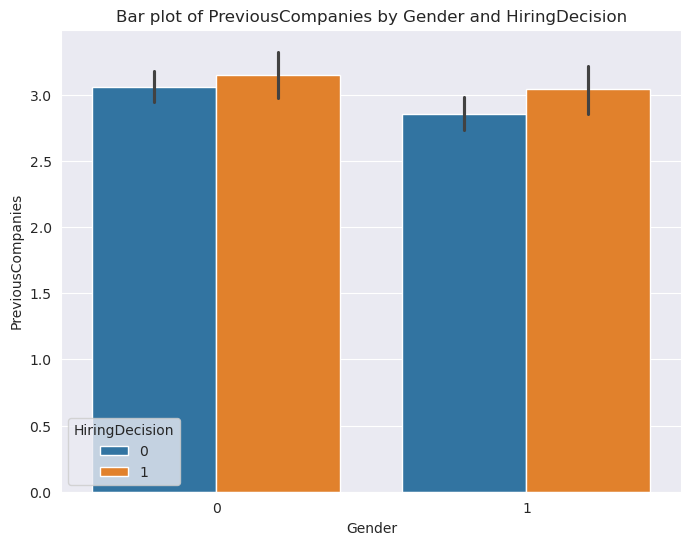

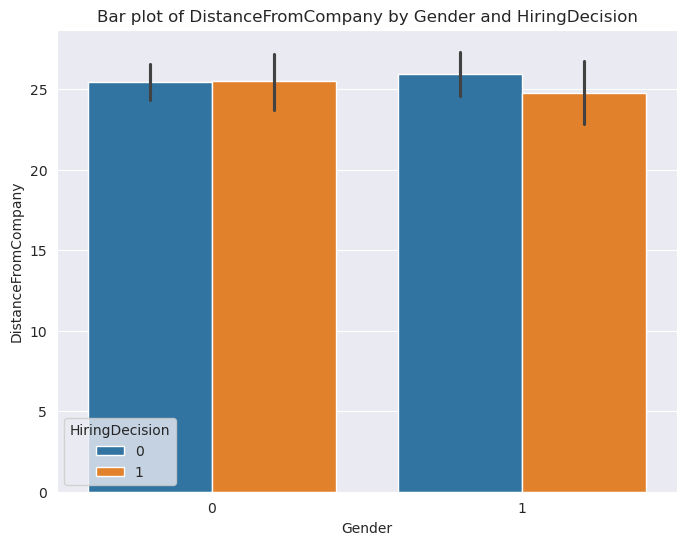

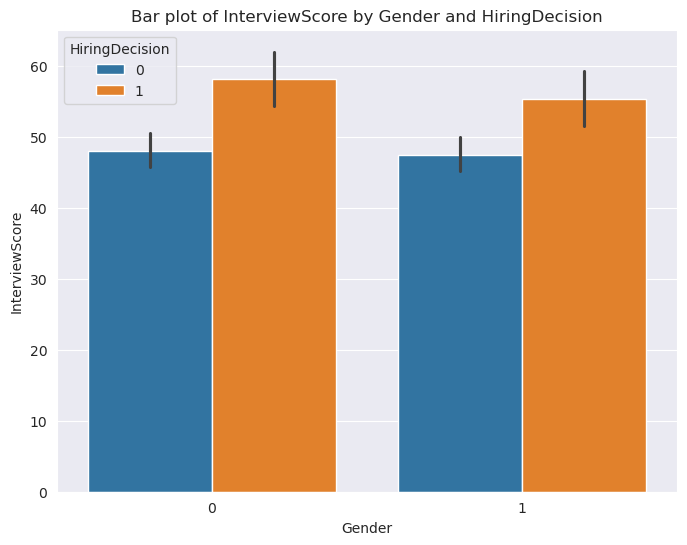

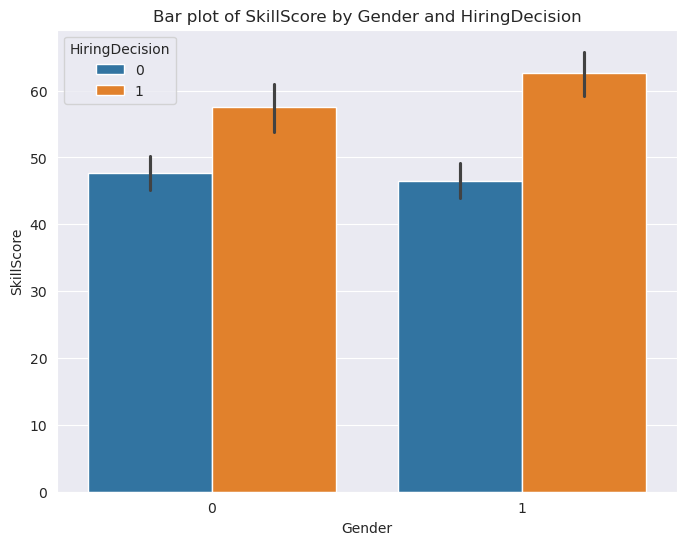

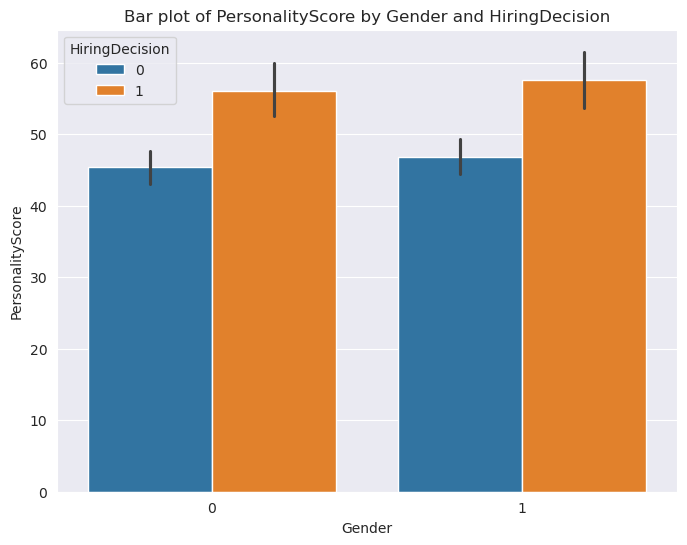

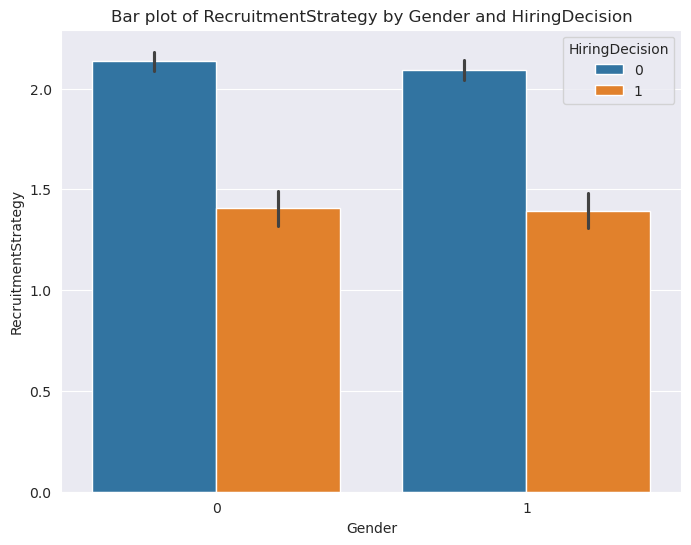

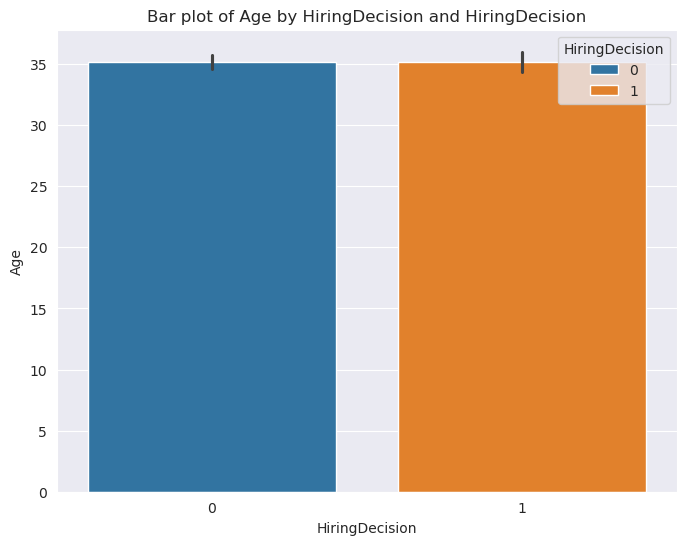

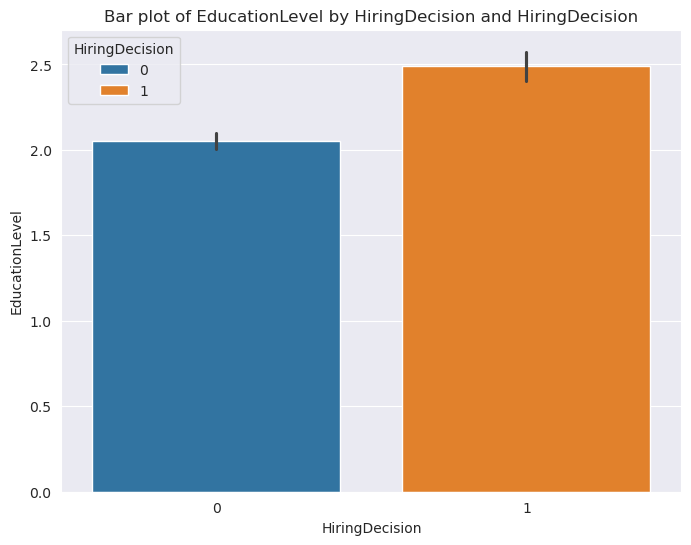

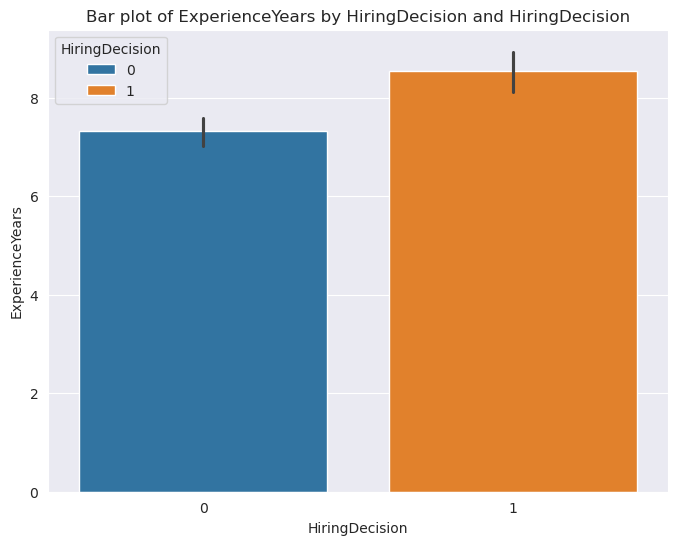

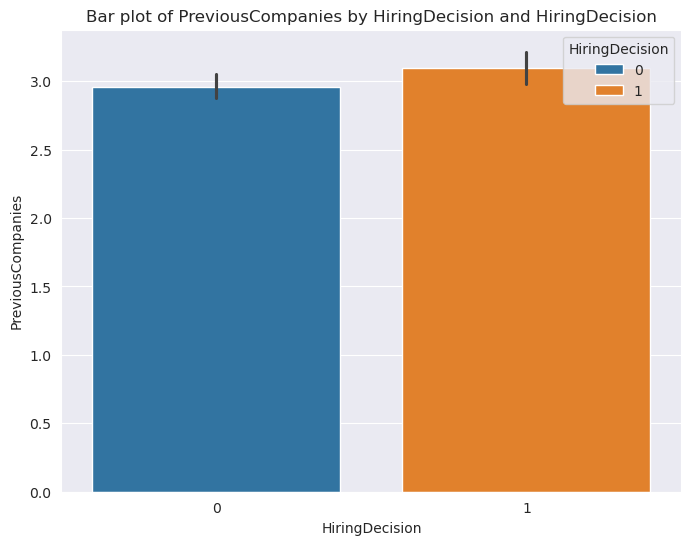

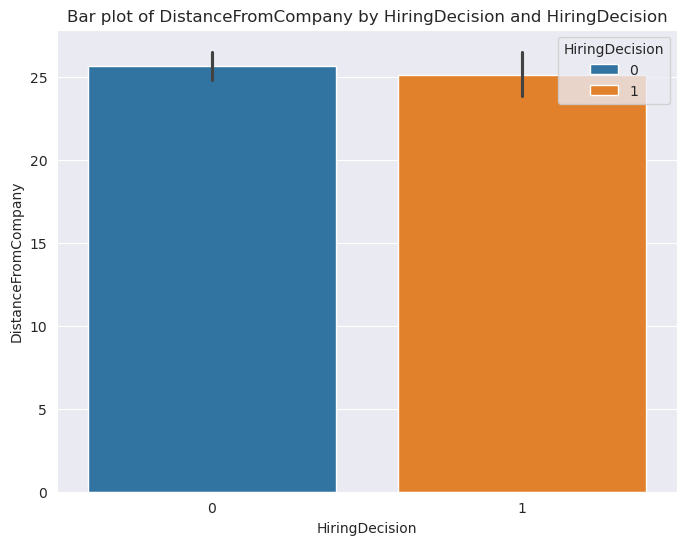

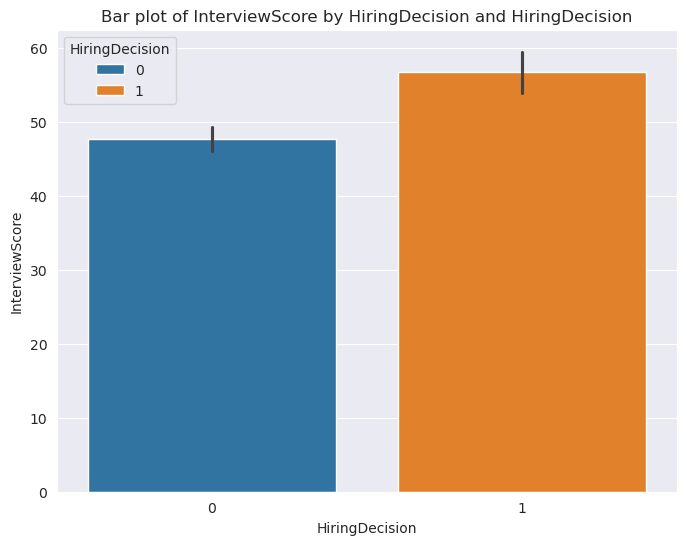

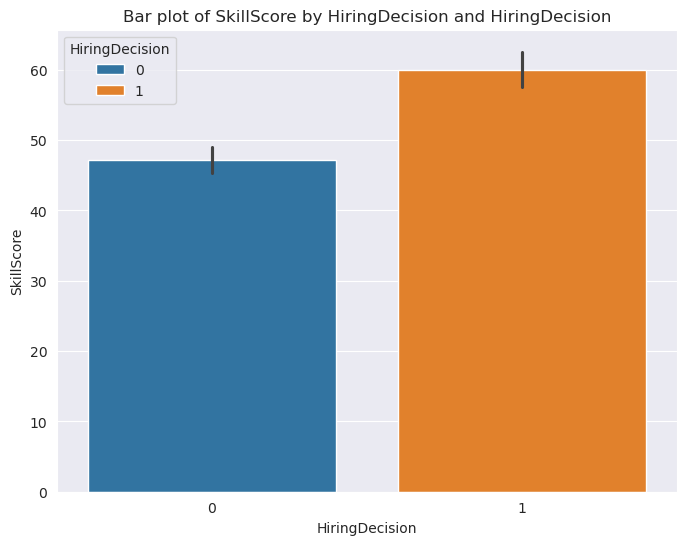

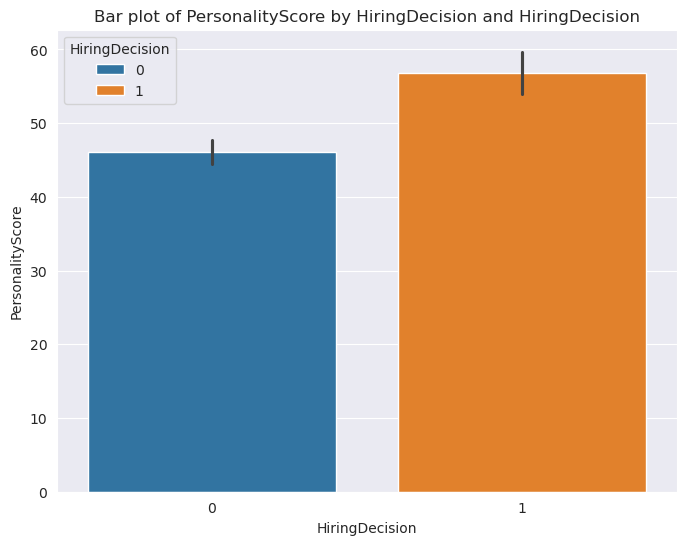

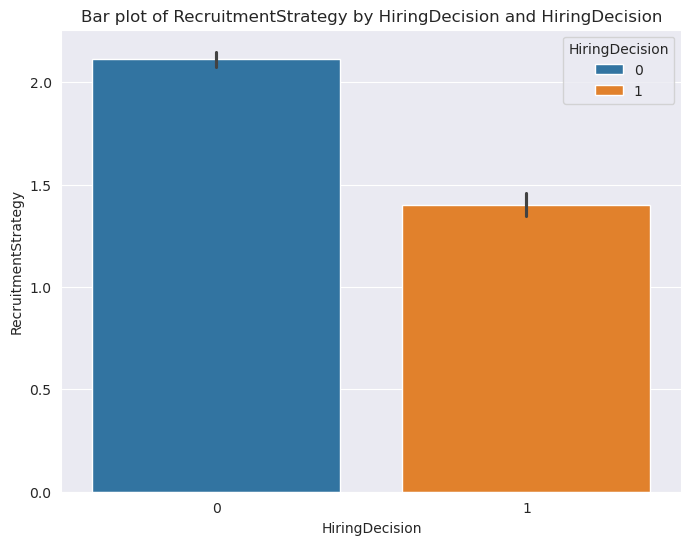

In [9]:
# Histograms
numerical_cols = ['Age', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'RecruitmentStrategy']
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.show()

# Box plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='HiringDecision', y=col, data=df)
    plt.title(f'Box plot of {col} vs HiringDecision')
    plt.show()

# Count plots
binary_cols = ['Gender', 'HiringDecision']
for col in binary_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count plot of {col}')
    plt.show()

# Pair plots
sns.pairplot(df, hue='HiringDecision', vars=numerical_cols)
plt.show()

# Correlation matrix
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Bar plots
for col in binary_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.barplot(x=col, y=num_col, hue='HiringDecision', data=df)
        plt.title(f'Bar plot of {num_col} by {col} and HiringDecision')
        plt.show()

# # Scatter plots
# for num_col in numerical_cols:
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=num_col, y='HiringDecision', data=df)
#     plt.title(f'Scatter plot of {num_col} vs HiringDecision')
#     plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

# Will only scale X

In [5]:
from sklearn.neighbors import KNeighborsClassifier  # NON-Linear
classifier = KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=8)

In [6]:
Y_pred=classifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

## Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix # Function not class
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[205,   6],
       [ 38,  51]])